In [2]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install --upgrade pandas lxml html5lib


In [3]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

In [8]:
# 1. Contar registros en el dataframe
record_count = len(height_weight_df)
print(f'Número de registros en el dataframe: {record_count}')

Número de registros en el dataframe: 200


In [9]:
# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada
X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [10]:
# 3. Hallar el intercepto
intercept = reg.intercept_
slope = reg.coef_[0]
print(f'Intercepto: {intercept}')
print(f'Pendiente: {slope}')

Intercepto: -106.02770644878137
Pendiente: 3.4326761292716297


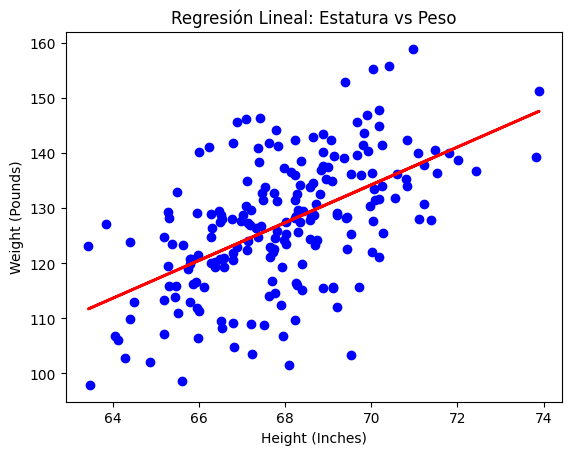

In [11]:
# 4. Hacer la gráfica
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='red', linewidth=2)
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('Regresión Lineal: Estatura vs Peso')
plt.show()

In [12]:
# 5. Hallar correlación y valor p
correlation, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])
print(f'Correlación: {correlation}')
print(f'Valor p: {p_value}')

Correlación: 0.5568647346122995
Valor p: 1.1029015151265851e-17


In [13]:
# 6. Interpretar el valor p
interpretation = ""
if p_value < 0.05:
    interpretation = "La relación entre estatura y peso es estadísticamente significativa."
else:
    interpretation = "La relación entre estatura y peso no es estadísticamente significativa."

print(interpretation)

La relación entre estatura y peso es estadísticamente significativa.
